In [1]:
#!/usr/bin/env python

In [2]:
import matplotlib as mpl
mpl.rcParams['savefig.directory'] = '/home/chieh/code/MachineLearningClasses/ML_2/3_Multivariate_sampling'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Parameters

In [4]:
alpha = 1.0    # Beta distribution parameter (skewed toward 0)
beta = 19.0    # Beta distribution parameter
n_samples = 4000  # Number of samples
n_bins = 50     # Number of bins for p values

Step 1: Sample from Beta and Bernoulli distributions

In [5]:
p_values = np.random.beta(alpha, beta, n_samples)
bernoulli_samples = np.random.binomial(1, p_values)

Step 2: Bin the p values and count frequencies for t=0 and t=1

In [6]:
p_bins = np.linspace(0, 1, n_bins + 1)  # Bin edges for p
t_values = [0, 1]  # Bernoulli outcomes

Compute histogram counts

In [7]:
counts = np.zeros((n_bins, len(t_values)))
for i in range(n_bins):
    # Indices of p_values in the current bin
    in_bin = (p_values >= p_bins[i]) & (p_values < p_bins[i + 1])
    # Count t=0 and t=1 in this bin
    counts[i, 0] = np.sum(bernoulli_samples[in_bin] == 0)
    counts[i, 1] = np.sum(bernoulli_samples[in_bin] == 1)

Step 3: Plot the 3D histogram

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

Define bar dimensions

In [9]:
dx = (p_bins[1] - p_bins[0]) * 0.8  # Width of bars (80% of bin width)
dy = 0.4  # Depth of bars (to separate t=0 and t=1)
dz_scale = 1.0  # Height scaling factor (optional)

Plot bars for each bin and t value

In [10]:
for i in range(n_bins):
    for j, t in enumerate(t_values):
        x = p_bins[i] + (p_bins[1] - p_bins[0]) / 2  # Center of bin
        y = t - dy / 2  # Offset to center bars
        dz = counts[i, j] * dz_scale
        
        ax.bar3d(
            x, y, 0,        # Coordinates of the base
            dx, dy, dz,     # Dimensions (width, depth, height)
            color='blue' if t == 0 else 'orange',
            alpha=0.7,
            edgecolor='k'
        )

Customize the plot

In [11]:
ax.set_xlabel('p (Beta distribution)', labelpad=12)
ax.set_ylabel('t (Bernoulli)', labelpad=12)
ax.set_zlabel('Frequency', labelpad=12)
ax.set_title('3D Histogram of Ancestral Sampling (Beta(1,19) → Bernoulli)', pad=20)

Text(0.5, 0.92, '3D Histogram of Ancestral Sampling (Beta(1,19) → Bernoulli)')

Set axis ticks and labels

In [12]:
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks([0, 1])
ax.set_yticklabels(['0', '1'])  # Label t=0 and t=1
ax.view_init(elev=25, azim=-45)  # Adjust viewing angle

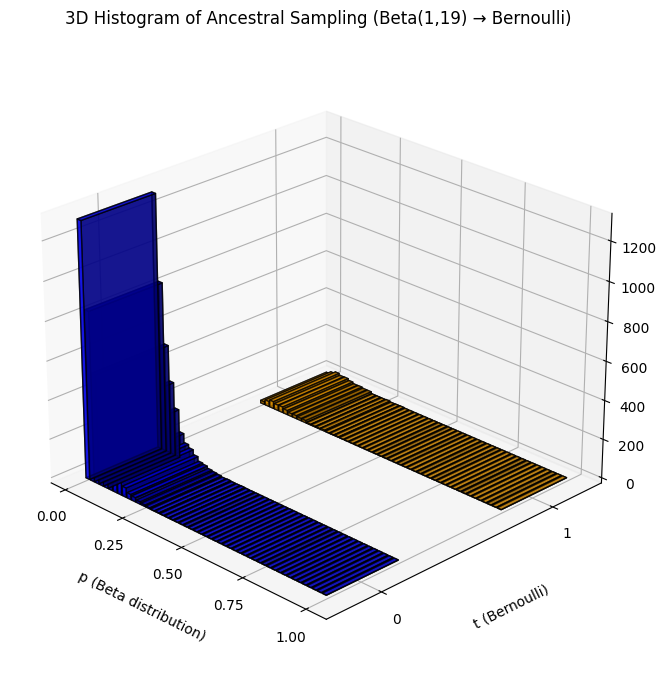

In [13]:
plt.show()